## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 19.09.2023

Мягкий дедлайн: 23:59MSK 02.10.2023

Жесткий дедлайн: 23:59MSK 06.10.2023

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

***Оценка: 8,5.***

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [2921]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2922]:
# your code

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [2923]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [2924]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [2925]:
# !powershell iwr -outf somefile https://somesite/somefile

In [2926]:
# !pip install wget
# import wget
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [2927]:
df = pd.read_excel('end_seminar.xlsx')
print(df.dtypes)
print(df.shape)
df.tail()

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object
(361, 16)


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок? **Done**

In [2928]:
print("Столбцы и пропуски:\n")
print(df.isnull().sum().sum(), '\n')
df.isnull().sum()


Столбцы и пропуски:

1233 



timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [2929]:
def fill_na(data):
  str_cols = data.columns[data.dtypes==object]
  digit_cols = data.columns[data.dtypes!=object]
  data[str_cols] = data[str_cols].fillna('')
  data = df.fillna(0)
  return data

df = fill_na(df)

print("Столбцы и пропуски:\n")
print(df.isnull().sum().sum(), '\n')
df.isnull().sum()


Столбцы и пропуски:

0 



timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. **Done**

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [2930]:
print('С повторами')
print()
print("Ответили НЕТ:", len(df[df["is_first_time"] == "Нет"]))
print("Ответили ДА:", len(df[df["is_first_time"] == "Да"]))
print("Уникальных id: {}".format(len(df['id'].unique())))
print("Pазмер таблицы: {}".format(df.shape))

С повторами

Ответили НЕТ: 51
Ответили ДА: 308
Уникальных id: 347
Pазмер таблицы: (361, 16)


In [2931]:
df1 = df.drop_duplicates(subset=['id'], keep='last')
print('Без повторов')
print()
print("Ответили НЕТ:", len(df1[df1["is_first_time"] == "Нет"]))
print("Ответили ДА:", len(df1[df1["is_first_time"] == "Да"]))
print("Уникальных id: {}".format(len(df1['id'].unique())))
print("Новый размер таблицы: {}".format(df1.shape))
df = df1

Без повторов

Ответили НЕТ: 51
Ответили ДА: 294
Уникальных id: 347
Новый размер таблицы: (347, 16)


#### 4. [0.5 балла] Ответьте на вопросы: **Done**
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [2932]:
print("Заявок 18-го года набора: {}".format(len(df[df["18_group"] != 0.0])))
print("Заявок 17-го года набора: {}".format(len(df[df["17_group"] != 0.0])))

Заявок 18-го года набора: 213
Заявок 17-го года набора: 134


In [2933]:
print("Студентов равными перцентилями: {}".format(df.shape[0] - len(set(df['percentile']))))

Студентов равными перцентилями: 1


#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)? **Done**

In [2934]:
blended_list = list(set(df[df["blended"] != '']['blended']))
print("Список blended-курсов:{}".format(blended_list))

Список blended-курсов:['DevOps', 'Соревновательный анализ данных', 'Введение в дифференциальную геометрию']


In [2935]:
print("Агрегация количества студентов по курсам:\n")
print(df.groupby(df["blended"]).agg({"id":"count"}).sort_values(by=['id'], ascending=False))

Агрегация количества студентов по курсам:

                                        id
blended                                   
                                       213
DevOps                                  87
Соревновательный анализ данных          32
Введение в дифференциальную геометрию   15


In [2936]:
print("На blended-курс: DevOps записалось наибольшее количество студентов: {}".format(87))

На blended-курс: DevOps записалось наибольшее количество студентов: 87


In [2937]:
print("Агрегация срeднего балла рейтинга студентов по курсам:\n")
print(df.groupby(df["blended"]).agg({"rating":"mean"}).sort_values(by=['rating'], ascending=False))
print('\n')
print("Cтуденты с самым высоким средним рейтингом на программе 'Введение в дифференциальную геометрию', где  15 студентов")

Агрегация срeднего балла рейтинга студентов по курсам:

                                            rating
blended                                           
Введение в дифференциальную геометрию  1210.733333
DevOps                                 1154.172414
Соревновательный анализ данных         1144.218750
                                        633.901408


Cтуденты с самым высоким средним рейтингом на программе 'Введение в дифференциальную геометрию', где  15 студентов


#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам. **Done**

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [2938]:
print('Таблица c комбинациями, где количество студентов больше 1')
df_combinations = df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).agg({'id':'count'})
df_combinations[df_combinations['id'] > 1]

Таблица c комбинациями, где количество студентов больше 1


id
fall_1                                          fall_2                                          fall_3                                          spring_1                                           spring_2                                    spring_3                                    blended    
Statistical Learning Theory                     Анализ неструктурированных данных               Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Конфликты и кооперация                      Компьютерное зрение                         DevOps    2
Байесовские методы машинного обучения           Анализ неструктурированных данных               Глубинное обучение в обработке звука            Обучение с подкреплением                           Генеративные модели в машинном обучении     Компьютерное зрение                         DevOps    2
                                                                                                Сбор и обработка данных с помощью краудсорсинга Обучение с подкреплением                           Компьютерное зрение                         Генеративные модели в машинном обучении     DevOps    2
Безопасность компьютерных систем                Statistical Learning Theory                     Матричные вычисления                            Дискретная оптимизация                             Промышленное программирование на языке Java Дополнительные главы прикладной статистики            3
                                                Высокопроизводительные вычисления               Анализ неструктурированных данных               Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Конфликты и кооперация                      DevOps    2
                                                                                                Язык SQL                                        Компьютерные сети                                  Промышленное программирование на языке Java Дискретная оптимизация                                3
                                                                                                                                                Промышленное программирование на языке Java        Компьютерные сети                           Системы баз данных                                    2
                                                Матричные вычисления                            Моделирование временных рядов                   Промышленное программирование на языке Java        Компьютерные сети                           Дискретная оптимизация                                2
                                                Сбор и обработка данных с помощью краудсорсинга Матричные вычисления                            Компьютерные сети                                  Промышленное программирование на языке Java Анализ данных в бизнесе                               2
                                                Теория баз данных                               Язык SQL                                        Машинное обучение 2                                Компьютерные сети                           Промышленное программирование на языке Java           2
Высокопроизводительные вычисления               Безопасность компьютерных систем                Сбор и обработка данных с помощью краудсорсинга Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Компьютерное зрение                         DevOps    2
                                                Сбор и обработка данных с помощью краудсорсинга Моделирование временных рядов                   Проектирование и разработка высоконагруженных с... Методы сжатия и передачи медиаданных        Методы сжатия и передачи медиаданных        DevOps    2
Моделирование временных рядов                   Сбор и обработка данных с помощью краудсорсинга Безопасность компьютерных систем                Компьютерные сети 

#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года. **Done**

In [2939]:
df_17 = df[df['blended'] != '']
df_18= df[df['blended'] == '']

time_cources_17 = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
time_cources_18 = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']

df_17 = df_17[time_cources_17]
df_18 = df_18[time_cources_18]

list_of_sets_17 = list(map(set,df_17.values.T))
list_of_sets_18 = list(map(set,df_18.values.T))

cources_17 = list(set.union(*list_of_sets_17))
cources_18 = list(set.union(*list_of_sets_18))

all_courses = set(cources_17 + cources_18) - set(blended_list)

print('Курсы, на которые записались студенты 17 и 18 года:\n')
set(cources_17) & set(cources_18)


Курсы, на которые записались студенты 17 и 18 года:



{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Численные методы'}

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [2940]:
print('Курсы, на которые записались студенты 17 года:\n', set(cources_17) - (set(cources_17) & set(cources_18)))
print('\n')
print('Курсы, на которые записались студенты 18 года:\n', set(cources_18) - (set(cources_17) & set(cources_18)))


Курсы, на которые записались студенты 17 года:
 {'DevOps', 'Методы сжатия и передачи медиаданных', 'Введение в дифференциальную геометрию', 'Символьные вычисления', 'Проектирование и разработка высоконагруженных сервисов', 'Генеративные модели в машинном обучении', 'Обучение с подкреплением', 'Байесовские методы машинного обучения', 'Анализ неструктурированных данных', 'Соревновательный анализ данных', 'Компьютерное зрение', 'Глубинное обучение в обработке звука', 'Конфликты и кооперация'}


Курсы, на которые записались студенты 18 года:
 {'Анализ данных в бизнесе', 'Компьютерные сети', 'Дискретная оптимизация', 'Теория баз данных', 'Дополнительные главы прикладной статистики', 'Системы баз данных', 'Промышленное программирование на языке Java', 'Машинное обучение 2', 'Матричные вычисления', 'Язык SQL'}


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [2941]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot). **Done**

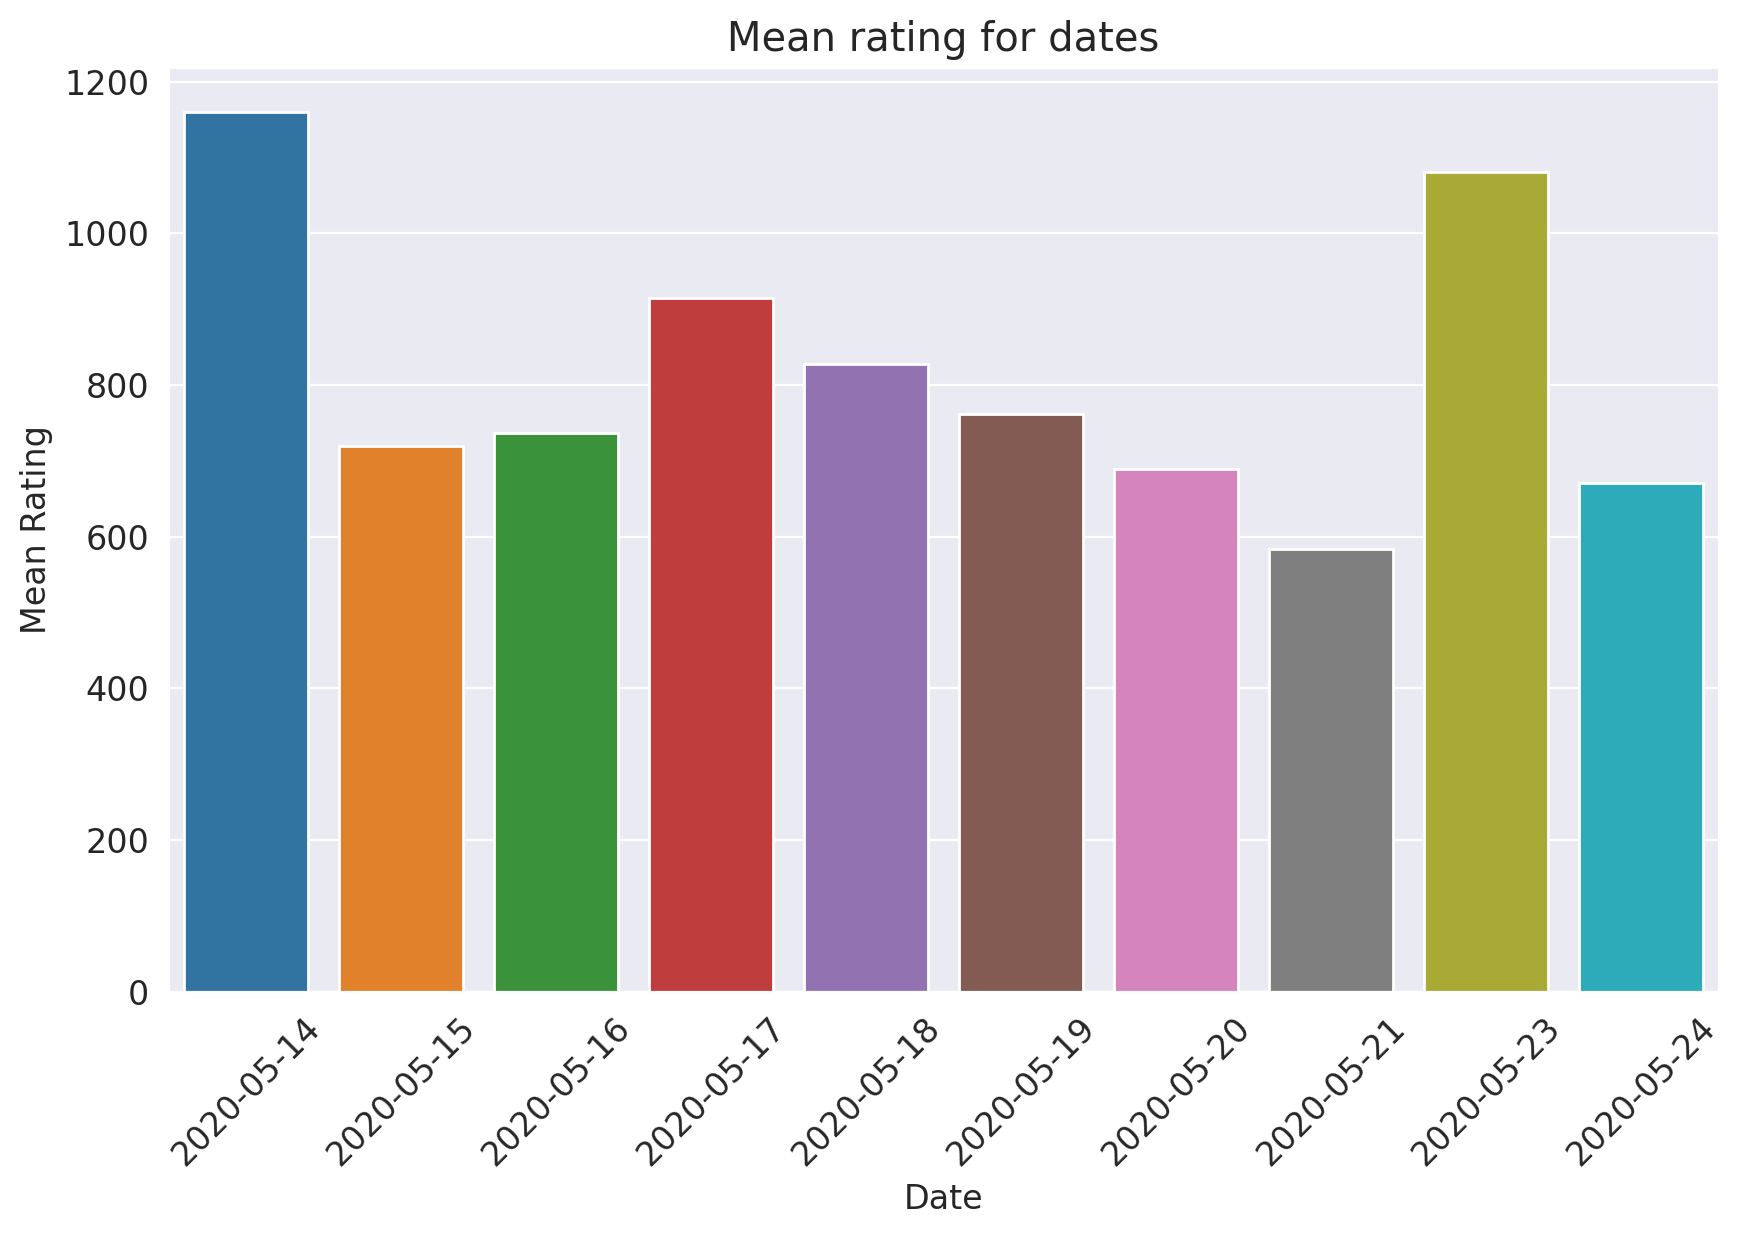

In [2942]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
mean_ratings = df.groupby("date")['rating'].mean().reset_index()

plt.rcParams['savefig.format'] = 'pdf'
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_ratings, x='date', y='rating')
plt.title("Mean rating for dates")
plt.xlabel("Date")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45)
plt.savefig('mean_rating_plot.pdf', format='pdf')
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [2943]:
# Исполнено выше

### 2. Распределение студентов по курсам.


<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая
их предпочтения.

*Алгоритм* распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [2944]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент **Done**

В этом вам может помочь информация о специализации и группе стундента.

In [2945]:
df[df['17_group'] != 0].head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,date
223,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,996,0.0,0.0,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да,0.963768,172.0,DevOps,0.0,2020-05-14
224,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,1106,0.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,0.673913,176.0,DevOps,0.0,2020-05-14
225,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,1084,0.0,0.0,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,0.782609,172.0,DevOps,0.0,2020-05-14
226,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,1170,0.0,0.0,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,0.442029,171.0,DevOps,0.0,2020-05-14
227,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,1078,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.789855,176.0,DevOps,0.0,2020-05-14


In [2946]:
# по умолчанию у всех 1 осенний курс
df['count_fall'] = 1

# студенты 17 года нобора моп и ти по 2 осенних
df.loc[df['17_group'].isin([171, 172, 173]), 'count_fall'] = 2

# студенты 18 года нобора ми 2 осенних (ми только у 18 года есть)
df.loc[(df['is_mi'] != 0), 'count_fall'] = 2

saveddf = df

Проверка:

In [2947]:
col_name = 'count_fall'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом **Done**

In [2948]:
fall_df = df[['id', 'percentile', 'count_fall', 'fall_1',	'fall_2',	'fall_3']]
fall_df


,id,percentile,count_fall,fall_1,fall_2,fall_3
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,1,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,1,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,1,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных
...,...,...,...,...,...,...
356,c5870b37ee3f672e4259dfb2fc02ed8f,0.920290,1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга
357,f44aea1095f9f5b8e2f5f0ed2b17891b,0.840580,1,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов
358,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных
359,79d14db48e4737af731960ae212d5134,0.985507,2,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных


In [2949]:
# словарь с количеством мест на курсе
all_courses
dict_courses = dict.fromkeys(all_courses, 30)
dict_courses['Statistical Learning Theory'] = 60
dict_courses['Высокопроизводительные вычисления'] = 60
dict_courses['Анализ неструктурированных данных'] = 10000
dict_courses

{'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Конфликты и кооперация': 30,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Численные методы': 30,
 'Теория баз данных': 30,
 'Анализ данных в бизнесе': 30,
 'Дискретная оптимизация': 30,
 'Обучение с подкреплением': 30,
 'Байесовские методы машинного обучения': 30,
 'Анализ неструктурированных данных': 10000,
 'Системы баз данных': 30,
 'Statistical Learning Theory': 60,
 'Промышленное программирование на языке Java': 30,
 'Компьютерное зрение': 30,
 'Символьные вычисления': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Высокопроизводительные вычисления': 60,
 'Дополнительные главы прикладной статистики': 30,
 'Моделирование временных рядов': 30,
 'Машинное обучение 2': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Глубинное обучение в обработке звука': 30,
 'Матричные вычисления': 30,
 'Язык SQL': 30,
 'Безопас

In [2950]:
all_courses
base_dict = dict.fromkeys(all_courses, 30)
base_dict['Statistical Learning Theory'] = 60
base_dict['Высокопроизводительные вычисления'] = 60
base_dict['Анализ неструктурированных данных'] = 10000
base_dict

{'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Конфликты и кооперация': 30,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Численные методы': 30,
 'Теория баз данных': 30,
 'Анализ данных в бизнесе': 30,
 'Дискретная оптимизация': 30,
 'Обучение с подкреплением': 30,
 'Байесовские методы машинного обучения': 30,
 'Анализ неструктурированных данных': 10000,
 'Системы баз данных': 30,
 'Statistical Learning Theory': 60,
 'Промышленное программирование на языке Java': 30,
 'Компьютерное зрение': 30,
 'Символьные вычисления': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Высокопроизводительные вычисления': 60,
 'Дополнительные главы прикладной статистики': 30,
 'Моделирование временных рядов': 30,
 'Машинное обучение 2': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Глубинное обучение в обработке звука': 30,
 'Матричные вычисления': 30,
 'Язык SQL': 30,
 'Безопас

In [2951]:
d1 = df.loc[df['count_fall'] == 1, ['id','percentile', 'fall_1']]
d2 = df.loc[df['count_fall'] == 2, ['id', 'percentile', 'fall_1', 'fall_2']]
df = pd.concat([d1, d2], ignore_index=True)
df

,id,percentile,fall_1,fall_2
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,Язык SQL,NaN
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,Высокопроизводительные вычисления,NaN
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,Безопасность компьютерных систем,NaN
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,Statistical Learning Theory,NaN
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,Высокопроизводительные вычисления,NaN
...,...,...,...,...
342,2c0a8cb6662b9a0a0a5d2d1214442767,0.666667,Анализ неструктурированных данных,Глубинное обучение в обработке звука
343,98c5a2548d93f26bd4195466e93178b3,0.905797,Байесовские методы машинного обучения,Глубинное обучение в обработке звука
344,ba298cbd9be59b84bab33325e956f27e,0.507246,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения
345,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory


In [2952]:
# Преобразуйте столбцы fall_1, fall_2 и fall_3 в один столбец и уберите дубликаты
melted_df = df.melt(id_vars=['id', 'percentile'], value_vars=['fall_1', 'fall_2'],
                    var_name='fall_number', value_name='fall_value')
melted_df

,id,percentile,fall_number,fall_value
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,fall_1,Язык SQL
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,fall_1,Высокопроизводительные вычисления
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,fall_1,Безопасность компьютерных систем
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,fall_1,Statistical Learning Theory
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,fall_1,Высокопроизводительные вычисления
...,...,...,...,...
689,2c0a8cb6662b9a0a0a5d2d1214442767,0.666667,fall_2,Глубинное обучение в обработке звука
690,98c5a2548d93f26bd4195466e93178b3,0.905797,fall_2,Глубинное обучение в обработке звука
691,ba298cbd9be59b84bab33325e956f27e,0.507246,fall_2,Байесовские методы машинного обучения
692,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,fall_2,Statistical Learning Theory


In [2953]:
melted_df = melted_df.sort_values(by=['percentile'])
melted_df.dropna()

,id,percentile,fall_number,fall_value
74,3e106aaef8b24dbb01319c73e14c2936,0.000000,fall_1,Безопасность компьютерных систем
277,3a7326c9e355a67d3805824ca34c4bc5,0.000000,fall_1,Statistical Learning Theory
624,3a7326c9e355a67d3805824ca34c4bc5,0.000000,fall_2,Высокопроизводительные вычисления
84,e0ca1a9548af9a3f98428c62420aa484,0.004484,fall_1,Матричные вычисления
211,7fe7df0d207babbf30249b3063ac1f26,0.007246,fall_1,Высокопроизводительные вычисления
...,...,...,...,...
693,79d14db48e4737af731960ae212d5134,0.985507,fall_2,Принятие решений в условиях риска и неопределё...
151,40b18d40197e3db66312a026e06b8ff1,0.986547,fall_1,Безопасность компьютерных систем
118,be4fa2120de3397ae21eac38ff0060e3,0.991031,fall_1,Безопасность компьютерных систем
243,d539461bf254cf8b3201cdf7990b119e,0.992754,fall_1,Анализ неструктурированных данных


In [2954]:
# Группируйте данные по fall_value и собирайте список ID без использования apply
result_df = melted_df.groupby('fall_value')['id'].agg(list).reset_index()
result_df
# # Выведите результат



,fall_value,id
0,Statistical Learning Theory,"[3a7326c9e355a67d3805824ca34c4bc5, 723d5f32b69..."
1,Анализ неструктурированных данных,"[7f98e4487c7a910567f2d841e5e764c3, 6a93fcbc79d..."
2,Байесовские методы машинного обучения,"[67e4ec4fe5c0601815692fbd6d403fb7, b3cbd3541c0..."
3,Безопасность компьютерных систем,"[3e106aaef8b24dbb01319c73e14c2936, bfe75c08c6b..."
4,Высокопроизводительные вычисления,"[3a7326c9e355a67d3805824ca34c4bc5, 7fe7df0d207..."
5,Глубинное обучение в обработке звука,"[67e4ec4fe5c0601815692fbd6d403fb7, 840716fde17..."
6,Матричные вычисления,"[e0ca1a9548af9a3f98428c62420aa484, cef7df6fa79..."
7,Моделирование временных рядов,"[dc7f705ae386b0457542a833571d51d0, ff549c331d4..."
8,Принятие решений в условиях риска и неопределё...,"[701078e1e897399f675e96bdda5fb149, 57c331c5a1b..."
9,Сбор и обработка данных с помощью краудсорсинга,"[86d929f6fd741e56e93cee5900298849, 425c2a90f44..."


In [2955]:
new = result_df.explode('id').reset_index(drop=True)
new


,fall_value,id
0,Statistical Learning Theory,3a7326c9e355a67d3805824ca34c4bc5
1,Statistical Learning Theory,723d5f32b699c971b4095a017c883ffa
2,Statistical Learning Theory,b3cbd3541c0cf66ff4eb2bc1596bb149
3,Statistical Learning Theory,1f63fc485d851236249263b91dc03d6b
4,Statistical Learning Theory,e4caca755ee0bdd711e18fb8084958b5
...,...,...
431,Язык SQL,162cbdeec1b766ab857df93cdf9d65f4
432,Язык SQL,cfe9fd28e4cbe0b46594b21f3067e30a
433,Язык SQL,a19f36ae8465cac527e8ce7b6ebf1213
434,Язык SQL,ab5248060fbaac411a79a62dfb0d263d


In [2956]:
first_df = fall_df
first_df['course_1'] = 0
first_df['course_2'] = 0

first_df['is_first_place'] = None
first_df['is_last_place'] = None

first_df

<ipython-input-2956-160c07510448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_df['course_1'] = 0
<ipython-input-2956-160c07510448>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_df['course_2'] = 0
<ipython-input-2956-160c07510448>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,id,percentile,count_fall,fall_1,fall_2,fall_3,course_1,course_2,is_first_place,is_last_place
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,1,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,0,0,None,None
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,0,0,None,None
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,1,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,0,0,None,None
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,1,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,0,0,None,None
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,0,0,None,None
...,...,...,...,...,...,...,...,...,...,...
356,c5870b37ee3f672e4259dfb2fc02ed8f,0.920290,1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,0,0,None,None
357,f44aea1095f9f5b8e2f5f0ed2b17891b,0.840580,1,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,0,0,None,None
358,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,0,0,None,None
359,79d14db48e4737af731960ae212d5134,0.985507,2,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,0,0,None,None


In [2957]:
for course in dict_courses.keys():
  course_rows = new[new['fall_value'] == course]
  count_rows = len(new[new['fall_value'] == course])
  available_positions = course_rows.iloc[: min(dict_courses[course], count_rows) ]
  if count_rows:
    id_s = available_positions['id'].values

    first_df.loc[(first_df['id'] == id_s[0]), 'is_first_place'] = True
    first_df.loc[(first_df['id'] == id_s[-1]), 'is_last_place'] = True

    first_df.loc[(first_df['id'].isin(id_s)) & (first_df['course_1'] == 0), 'course_1'] = course
    first_df.loc[(first_df['id'].isin(id_s)) & (first_df['course_2'] == 0) & (first_df['count_fall'] == 2) & (first_df['course_1'] != course), 'course_2'] = course




In [2958]:
first_df
df = first_df
df

,id,percentile,count_fall,fall_1,fall_2,fall_3,course_1,course_2,is_first_place,is_last_place
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,1,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Язык SQL,0,True,None
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,0,None,None
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,1,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,0,0,None,None
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,1,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Statistical Learning Theory,0,None,None
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Высокопроизводительные вычисления,0,None,None
...,...,...,...,...,...,...,...,...,...,...
356,c5870b37ee3f672e4259dfb2fc02ed8f,0.920290,1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,0,None,None
357,f44aea1095f9f5b8e2f5f0ed2b17891b,0.840580,1,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Анализ неструктурированных данных,0,None,None
358,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Statistical Learning Theory,0,None,None
359,79d14db48e4737af731960ae212d5134,0.985507,2,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Принятие решений в условиях риска и неопределё...,0,None,None


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [2959]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')
check_df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,is_first_place,is_last_place
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,NaN,0.0,True,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,NaN,0.0,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,NaN,0.0,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,NaN,0.0,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,NaN,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,NaN,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,NaN,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,NaN,NaN


После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [2960]:
fir_col_name = 'is_first_place'
last_col_name = 'is_last_place'


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору **Done**

In [2961]:
df.head()
first_df = df

In [2962]:
# оставить нераспределенных

cond_1 = ( (df['course_1'] == 0) & (df['count_fall'] == 1) )
cond_2 = ( (df['count_fall'] == 2)  &  ( (df['course_1'] == 0) | (df['course_2'] == 0) ) )

df2 = df.loc[ cond_1 | cond_2 ]

df2


,id,percentile,count_fall,fall_1,fall_2,fall_3,course_1,course_2,is_first_place,is_last_place
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,1,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,0,0,None,None
16,64173586abab6f7a172946c8c74bde0d,0.502242,1,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,0,0,None,None
20,f0f6f3881894172a0f04e79b554b49e6,0.300448,1,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,0,0,None,None
23,a65d50ef4fadfac64508a54e972d8623,0.526906,1,Безопасность компьютерных систем,Высокопроизводительные вычисления,Матричные вычисления,0,0,None,None
24,cddf159101f9a5a30f9041ceebdb2835,0.408072,1,Безопасность компьютерных систем,Теория баз данных,Язык SQL,0,0,None,None
...,...,...,...,...,...,...,...,...,...,...
348,cef24632489091cb8c085688b7d78dec,0.717391,2,Глубинное обучение в обработке звука,Сбор и обработка данных с помощью краудсорсинга,Анализ неструктурированных данных,Глубинное обучение в обработке звука,0,None,None
351,8fe79f84f36e3a5d2d6745621321302c,0.942029,1,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,0,0,None,None
353,9963fc00d9405a35b894cc04a7e19855,0.572464,1,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,0,0,None,None
358,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Statistical Learning Theory,0,None,None


In [2963]:
d1 = df2.loc[df2['count_fall'] == 1, ['id','percentile', 'fall_2']]
d2 = df2.loc[df2['count_fall'] == 2, ['id', 'percentile', 'fall_3']]
df2 = pd.concat([d1, d2], ignore_index=True)
df2

,id,percentile,fall_2,fall_3
0,30f3653fc176d54e89ac3179c455c6dd,0.538117,Матричные вычисления,NaN
1,64173586abab6f7a172946c8c74bde0d,0.502242,Высокопроизводительные вычисления,NaN
2,f0f6f3881894172a0f04e79b554b49e6,0.300448,Сбор и обработка данных с помощью краудсорсинга,NaN
3,a65d50ef4fadfac64508a54e972d8623,0.526906,Высокопроизводительные вычисления,NaN
4,cddf159101f9a5a30f9041ceebdb2835,0.408072,Теория баз данных,NaN
...,...,...,...,...
100,de539be8b29b3afa002184e28d63c670,0.949275,NaN,Глубинное обучение в обработке звука
101,01b072a0cdb45814fc4ab8ca3e621f0e,0.847826,NaN,Моделирование временных рядов
102,cef24632489091cb8c085688b7d78dec,0.717391,NaN,Анализ неструктурированных данных
103,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,NaN,Анализ неструктурированных данных


In [2964]:
melted_df = df2.melt(id_vars=['id', 'percentile'], value_vars=['fall_2', 'fall_3'],
                    var_name='fall_number', value_name='fall_value')
melted_df.head()

,id,percentile,fall_number,fall_value
0,30f3653fc176d54e89ac3179c455c6dd,0.538117,fall_2,Матричные вычисления
1,64173586abab6f7a172946c8c74bde0d,0.502242,fall_2,Высокопроизводительные вычисления
2,f0f6f3881894172a0f04e79b554b49e6,0.300448,fall_2,Сбор и обработка данных с помощью краудсорсинга
3,a65d50ef4fadfac64508a54e972d8623,0.526906,fall_2,Высокопроизводительные вычисления
4,cddf159101f9a5a30f9041ceebdb2835,0.408072,fall_2,Теория баз данных


In [2965]:
melted_df = melted_df.sort_values(by=['percentile'])
melted_df.dropna()

,id,percentile,fall_number,fall_value
19,081eba3952cfc116e0e9b941d6a974a2,0.215247,fall_2,Матричные вычисления
28,d08d06bc5d31e35616fafc59de6f2e34,0.219731,fall_2,Матричные вычисления
21,86eebda725013685effcb0c97591132e,0.224215,fall_2,Язык SQL
22,7f9d0f835bf734ccd4619041c3475c1c,0.228700,fall_2,Statistical Learning Theory
29,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,fall_2,Моделирование временных рядов
...,...,...,...,...
198,f2e1cfc27a724879ac2a8c98004c14b0,0.978261,fall_3,Глубинное обучение в обработке звука
32,f5d9f99cb876ca0888d18b6e444fa1b1,0.982063,fall_2,Язык SQL
209,79d14db48e4737af731960ae212d5134,0.985507,fall_3,Анализ неструктурированных данных
49,40b18d40197e3db66312a026e06b8ff1,0.986547,fall_2,Язык SQL


In [2966]:
# Группируйте данные по fall_value и собирайте список ID без использования apply
result_df = melted_df.groupby('fall_value')['id'].agg(list).reset_index()
result_df
# # Выведите результат


,fall_value,id
0,Statistical Learning Theory,"[7f9d0f835bf734ccd4619041c3475c1c, 2ba0a356c95..."
1,Анализ неструктурированных данных,"[d7118b44c7e8fdbbaaca226d2da6fef1, cef24632489..."
2,Байесовские методы машинного обучения,[d555d2805e1d93d4f023e57dc4c8f403]
3,Безопасность компьютерных систем,"[7fcf56aae6836855a689000a50e80360, 635e9ca4fcf..."
4,Высокопроизводительные вычисления,"[31e38f7596f83b72ebba1c6fc6b7a590, 8e8d87fd686..."
5,Глубинное обучение в обработке звука,"[492c677be00bb8223ebbaffa3aff2549, ba028043bab..."
6,Матричные вычисления,"[081eba3952cfc116e0e9b941d6a974a2, d08d06bc5d3..."
7,Моделирование временных рядов,"[76d70b75a12f7b2ae593d02da6ed62ec, 34f75b81eb7..."
8,Принятие решений в условиях риска и неопределё...,[6a93b58f867db41e822a03c26c1bd428]
9,Сбор и обработка данных с помощью краудсорсинга,"[cabc5ea85cac3029dc2aecc4955f9cf3, f0f6f388189..."


In [2967]:
new = result_df.explode('id').reset_index(drop=True)
new

,fall_value,id
0,Statistical Learning Theory,7f9d0f835bf734ccd4619041c3475c1c
1,Statistical Learning Theory,2ba0a356c95af4fe74272e708082086f
2,Statistical Learning Theory,fd784637a19d65bbe5b07d6efac5a05d
3,Statistical Learning Theory,eb1d7205d913319ef3d48e0719839849
4,Statistical Learning Theory,39cd1820459fdbcc193f9bb0ddb74a58
...,...,...
100,Язык SQL,00b40fe7dbfd23e5daba765244509415
101,Язык SQL,32fea7beb180e7de64ad408013cc01ec
102,Язык SQL,f5d9f99cb876ca0888d18b6e444fa1b1
103,Язык SQL,40b18d40197e3db66312a026e06b8ff1


In [2968]:
dict_courses

{'Сбор и обработка данных с помощью краудсорсинга': 30,
 'Конфликты и кооперация': 30,
 'Принятие решений в условиях риска и неопределённости': 30,
 'Численные методы': 30,
 'Теория баз данных': 30,
 'Анализ данных в бизнесе': 30,
 'Дискретная оптимизация': 30,
 'Обучение с подкреплением': 30,
 'Байесовские методы машинного обучения': 30,
 'Анализ неструктурированных данных': 10000,
 'Системы баз данных': 30,
 'Statistical Learning Theory': 60,
 'Промышленное программирование на языке Java': 30,
 'Компьютерное зрение': 30,
 'Символьные вычисления': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Высокопроизводительные вычисления': 60,
 'Дополнительные главы прикладной статистики': 30,
 'Моделирование временных рядов': 30,
 'Машинное обучение 2': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Глубинное обучение в обработке звука': 30,
 'Матричные вычисления': 30,
 'Язык SQL': 30,
 'Безопас

In [2969]:
# обновить даные словаря о доступных местах

for c in dict_courses.keys():
  l = len(df[df['course_1'] == c]) + len(df[df['course_2'] == c])
  avail = dict_courses[c] - l
  dict_courses[c] = avail


dict_courses

{'Сбор и обработка данных с помощью краудсорсинга': 0,
 'Конфликты и кооперация': 30,
 'Принятие решений в условиях риска и неопределённости': 22,
 'Численные методы': 30,
 'Теория баз данных': 16,
 'Анализ данных в бизнесе': 30,
 'Дискретная оптимизация': 30,
 'Обучение с подкреплением': 30,
 'Байесовские методы машинного обучения': 6,
 'Анализ неструктурированных данных': 9952,
 'Системы баз данных': 30,
 'Statistical Learning Theory': 27,
 'Промышленное программирование на языке Java': 30,
 'Компьютерное зрение': 30,
 'Символьные вычисления': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Высокопроизводительные вычисления': 16,
 'Дополнительные главы прикладной статистики': 30,
 'Моделирование временных рядов': 0,
 'Машинное обучение 2': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Глубинное обучение в обработке звука': 7,
 'Матричные вычисления': 15,
 'Язык SQL': 1,
 'Безопасность 

In [2970]:
for course in dict_courses.keys():
  course_rows = new[new['fall_value'] == course]
  count_rows = len(new[new['fall_value'] == course])
  if count_rows:
    available_positions = course_rows.iloc[: min(dict_courses[course], count_rows) ]
    id_s = available_positions['id'].values
    # print(id_s)
  first_df.loc[(first_df['id'].isin(id_s)) & (first_df['course_1'] == 0), 'course_1'] = course
  first_df.loc[(first_df['id'].isin(id_s)) & (first_df['course_2'] == 0) & (first_df['count_fall'] == 2) & (first_df['course_1'] != course), 'course_2'] = course



In [2971]:
first_df
df = first_df
df

,id,percentile,count_fall,fall_1,fall_2,fall_3,course_1,course_2,is_first_place,is_last_place
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,1,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Язык SQL,0,True,None
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,0,None,None
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,1,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Матричные вычисления,0,None,None
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,1,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Statistical Learning Theory,0,None,None
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Высокопроизводительные вычисления,0,None,None
...,...,...,...,...,...,...,...,...,...,...
356,c5870b37ee3f672e4259dfb2fc02ed8f,0.920290,1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,0,None,None
357,f44aea1095f9f5b8e2f5f0ed2b17891b,0.840580,1,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Анализ неструктурированных данных,0,None,None
358,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Statistical Learning Theory,Анализ неструктурированных данных,None,None
359,79d14db48e4737af731960ae212d5134,0.985507,2,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,None,None


In [2972]:
# ------------------ третья волна
first_df = df


In [2973]:
cond_1 = ( (df['course_1'] == 0) & (df['count_fall'] == 1) )

df3 = df.loc[cond_1]
df3


,id,percentile,count_fall,fall_1,fall_2,fall_3,course_1,course_2,is_first_place,is_last_place
20,f0f6f3881894172a0f04e79b554b49e6,0.300448,1,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,0,0,None,None
38,e3d4f9a7b947ebc03d345dd9e14b5d2c,0.959641,1,Безопасность компьютерных систем,Высокопроизводительные вычисления,Матричные вычисления,0,0,None,None
40,d38ebd0ba564ea88de8015e116f811c8,0.883408,1,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,0,0,None,None
47,34f75b81eb7b1cc9e9e4ef5bfd7fa69a,0.278027,1,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,0,0,None,None
50,323f162a5cad5f11e84bf294dd73197e,0.627803,1,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,0,0,None,None
52,ef8c6afd958da5f51429948f090432da,0.964126,1,Сбор и обработка данных с помощью краудсорсинга,Высокопроизводительные вычисления,Матричные вычисления,0,0,None,None
74,635e9ca4fcf26a2bd38b8488a8edfca5,0.847534,1,Сбор и обработка данных с помощью краудсорсинга,Безопасность компьютерных систем,Язык SQL,0,0,None,None
86,9f23846141606a1e26e8e4c28e9a7262,0.950673,1,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Язык SQL,0,0,None,None
98,5ee2ad618729a6dc3bdb7f2858826ef0,0.513453,1,Безопасность компьютерных систем,Язык SQL,Теория баз данных,0,0,None,None
99,32fea7beb180e7de64ad408013cc01ec,0.910314,1,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,0,0,None,None


In [2974]:
melted_df = df3.melt(id_vars=['id', 'percentile'], value_vars=['fall_1', 'fall_2'],
                    var_name='fall_number', value_name='fall_value')
melted_df


,id,percentile,fall_number,fall_value
0,f0f6f3881894172a0f04e79b554b49e6,0.300448,fall_1,Безопасность компьютерных систем
1,e3d4f9a7b947ebc03d345dd9e14b5d2c,0.959641,fall_1,Безопасность компьютерных систем
2,d38ebd0ba564ea88de8015e116f811c8,0.883408,fall_1,Безопасность компьютерных систем
3,34f75b81eb7b1cc9e9e4ef5bfd7fa69a,0.278027,fall_1,Безопасность компьютерных систем
4,323f162a5cad5f11e84bf294dd73197e,0.627803,fall_1,Безопасность компьютерных систем
...,...,...,...,...
81,aeb7bb1e047c392b7e5e39225cd86422,0.898551,fall_2,Моделирование временных рядов
82,0a3bf60d68e9bcb118ba4b472eabebc8,0.688406,fall_2,Высокопроизводительные вычисления
83,07b6ce7fd93bde95ce5fe14a5131a960,0.485507,fall_2,Сбор и обработка данных с помощью краудсорсинга
84,085da16dd3062b4790c3dabdc08a51cf,0.876812,fall_2,Сбор и обработка данных с помощью краудсорсинга


In [2975]:
melted_df = melted_df.sort_values(by=['percentile'])
melted_df.dropna()

,id,percentile,fall_number,fall_value
53,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,fall_2,Моделирование временных рядов
10,76d70b75a12f7b2ae593d02da6ed62ec,0.233184,fall_1,Безопасность компьютерных систем
64,cabc5ea85cac3029dc2aecc4955f9cf3,0.242152,fall_2,Сбор и обработка данных с помощью краудсорсинга
21,cabc5ea85cac3029dc2aecc4955f9cf3,0.242152,fall_1,Безопасность компьютерных систем
3,34f75b81eb7b1cc9e9e4ef5bfd7fa69a,0.278027,fall_1,Безопасность компьютерных систем
...,...,...,...,...
12,f5d9f99cb876ca0888d18b6e444fa1b1,0.982063,fall_1,Сбор и обработка данных с помощью краудсорсинга
26,40b18d40197e3db66312a026e06b8ff1,0.986547,fall_1,Безопасность компьютерных систем
69,40b18d40197e3db66312a026e06b8ff1,0.986547,fall_2,Язык SQL
60,be4fa2120de3397ae21eac38ff0060e3,0.991031,fall_2,Язык SQL


In [2976]:
# Группируйте данные по fall_value и собирайте список ID без использования apply
result_df = melted_df.groupby('fall_value')['id'].agg(list).reset_index()
result_df
# # Выведите результат


,fall_value,id
0,Безопасность компьютерных систем,"[76d70b75a12f7b2ae593d02da6ed62ec, cabc5ea85ca..."
1,Высокопроизводительные вычисления,"[26e72efe2995eb032a25561b2bf78600, 0a3bf60d68e..."
2,Моделирование временных рядов,"[76d70b75a12f7b2ae593d02da6ed62ec, 34f75b81eb7..."
3,Сбор и обработка данных с помощью краудсорсинга,"[cabc5ea85cac3029dc2aecc4955f9cf3, f0f6f388189..."
4,Язык SQL,"[7bf79897c5645954846e2e03ec803887, 5ee2ad61872..."


In [2977]:
new = result_df.explode('id').reset_index(drop=True)
new


,fall_value,id
0,Безопасность компьютерных систем,76d70b75a12f7b2ae593d02da6ed62ec
1,Безопасность компьютерных систем,cabc5ea85cac3029dc2aecc4955f9cf3
2,Безопасность компьютерных систем,34f75b81eb7b1cc9e9e4ef5bfd7fa69a
3,Безопасность компьютерных систем,f0f6f3881894172a0f04e79b554b49e6
4,Безопасность компьютерных систем,7bf79897c5645954846e2e03ec803887
...,...,...
81,Язык SQL,00b40fe7dbfd23e5daba765244509415
82,Язык SQL,32fea7beb180e7de64ad408013cc01ec
83,Язык SQL,f5d9f99cb876ca0888d18b6e444fa1b1
84,Язык SQL,40b18d40197e3db66312a026e06b8ff1


In [2978]:
first_df

,id,percentile,count_fall,fall_1,fall_2,fall_3,course_1,course_2,is_first_place,is_last_place
0,93ff79a51cd602f1dd3028ba2c129503,0.183857,1,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Язык SQL,0,True,None
1,26b01b1c4cd5656bab18d24c548834fb,0.426009,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Высокопроизводительные вычисления,0,None,None
2,30f3653fc176d54e89ac3179c455c6dd,0.538117,1,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Матричные вычисления,0,None,None
3,1528f0eaa027580820ccf0d92a53ad68,0.744395,1,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Statistical Learning Theory,0,None,None
4,496ea4f0d4abe264b1bb1b80eb3830c5,0.780269,1,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Высокопроизводительные вычисления,0,None,None
...,...,...,...,...,...,...,...,...,...,...
356,c5870b37ee3f672e4259dfb2fc02ed8f,0.920290,1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,0,None,None
357,f44aea1095f9f5b8e2f5f0ed2b17891b,0.840580,1,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Анализ неструктурированных данных,0,None,None
358,d7118b44c7e8fdbbaaca226d2da6fef1,0.652174,2,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Statistical Learning Theory,Анализ неструктурированных данных,None,None
359,79d14db48e4737af731960ae212d5134,0.985507,2,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,None,None


In [2979]:
dict_courses

{'Сбор и обработка данных с помощью краудсорсинга': 0,
 'Конфликты и кооперация': 30,
 'Принятие решений в условиях риска и неопределённости': 22,
 'Численные методы': 30,
 'Теория баз данных': 16,
 'Анализ данных в бизнесе': 30,
 'Дискретная оптимизация': 30,
 'Обучение с подкреплением': 30,
 'Байесовские методы машинного обучения': 6,
 'Анализ неструктурированных данных': 9952,
 'Системы баз данных': 30,
 'Statistical Learning Theory': 27,
 'Промышленное программирование на языке Java': 30,
 'Компьютерное зрение': 30,
 'Символьные вычисления': 30,
 'Проектирование и разработка высоконагруженных сервисов': 30,
 'Генеративные модели в машинном обучении': 30,
 'Компьютерные сети': 30,
 'Высокопроизводительные вычисления': 16,
 'Дополнительные главы прикладной статистики': 30,
 'Моделирование временных рядов': 0,
 'Машинное обучение 2': 30,
 'Методы сжатия и передачи медиаданных': 30,
 'Глубинное обучение в обработке звука': 7,
 'Матричные вычисления': 15,
 'Язык SQL': 1,
 'Безопасность 

In [2980]:


for course in dict_courses.keys():
  course_rows = new[new['fall_value'] == course]
  count_rows = len(new[new['fall_value'] == course])
  if count_rows and dict_courses[course]:
    available_positions = course_rows.iloc[: min(dict_courses[course], count_rows) ]
    print(course, (dict_courses[course], count_rows))
    id_s = available_positions['id'].values
    print(id_s)
    print(id_s[0], id_s[-1], course)

    first_df.loc[(first_df['id'].isin(id_s)) & (first_df['course_1'] == 0) & (first_df['count_fall'] == 1), 'course_1'] = course



Высокопроизводительные вычисления (16, 10)
['26e72efe2995eb032a25561b2bf78600' '0a3bf60d68e9bcb118ba4b472eabebc8'
 '8c3aa7371731bef999519c3de2c47423' 'f2ed8115db45ef795ced2701fa86515d'
 '1bbbfae51794b83c769b634be8da7b8d' '180cf0e0dc7a6f88e76e3076cb761d26'
 'd38ebd0ba564ea88de8015e116f811c8' '8fe79f84f36e3a5d2d6745621321302c'
 'e3d4f9a7b947ebc03d345dd9e14b5d2c' 'ef8c6afd958da5f51429948f090432da']
26e72efe2995eb032a25561b2bf78600 ef8c6afd958da5f51429948f090432da Высокопроизводительные вычисления
Язык SQL (1, 13)
['7bf79897c5645954846e2e03ec803887']
7bf79897c5645954846e2e03ec803887 7bf79897c5645954846e2e03ec803887 Язык SQL


In [2981]:
res = first_df[['id', 'count_fall','course_1', 'course_2']]


In [2982]:
res['course1'] = res['course_1'].mask(df['course_1'] == 0, '???')
res['course2'] = res['course_2'].mask(df['course_2'] == 0, '-')

res = res[['id', 'course1', 'course2']]
res.rename(columns={'id': 'ID'}, inplace=True)

res.to_csv('res_fall.csv', index=None)

<ipython-input-2982-6565bcb3f744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['course1'] = res['course_1'].mask(df['course_1'] == 0, '???')
<ipython-input-2982-6565bcb3f744>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['course2'] = res['course_2'].mask(df['course_2'] == 0, '-')
<ipython-input-2982-6565bcb3f744>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/52663/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

**Я пытался..**
F
FAIL: test_file (__main__.TestFile)

Traceback (most recent call last):
  File "something.py", line 32, in test_file
    assert submission_data == solution_data, 'Failed, guessed {} out of {}'.format(correct, len(submission_data))
AssertionError: Failed, **guessed 310 out of 347**


Ran 1 test in 0.004s

FAILED (failures=1)
make: *** [run] Error 1


*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего.

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [2983]:
# (￣^'￣)ゞ

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/52663/problems/A) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания: